In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv")

In [5]:
df.count()

click             2697738
weekday           2697738
hour              2697738
bidid             2697738
logtype           2697738
userid            2697738
useragent         2697738
IP                2697738
region            2697738
city              2697738
adexchange        2697738
domain            2697738
url               2697738
urlid             2697738
slotid            2697738
slotwidth         2697738
slotheight        2697738
slotvisibility    2697738
slotformat        2697738
slotprice         2697738
creative          2697738
bidprice          2697738
payprice          2697738
keypage           2697738
advertiser        2697738
usertag           2697738
dtype: int64

In [6]:
df.head()   #Weekday = 0 - 6 

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."


In [7]:
df.isnull().any(1).nonzero()[0]

array([], dtype=int64)

In [8]:
df.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

#### Need to write down all the relevent columns containing null or na values 

In [9]:
#Values count of all the unique items within each of the columns

for name in df.columns.values:
    a = df[name].value_counts()
    print (a)
    

0    2695704
1       2034
Name: click, dtype: int64
0    465241
1    408417
3    380111
5    378028
6    376514
4    361376
2    328051
Name: weekday, dtype: int64
0     202239
22    172076
18    171748
16    166315
15    166252
17    159044
13    155792
14    145782
11    143110
12    142075
10    140537
20    134229
19    132278
23    126138
21    112438
9      90397
8      76370
1      66660
7      51105
2      38384
3      36754
6      25624
5      21748
4      20643
Name: hour, dtype: int64
a26daec5a365bc9bddd416c1b36f6c06    1
9100cecb308edd1ef7a40697d902689b    1
46d783550b53b21edc6a5b238ad44c61    1
24db456ffb7d3e1017cb922ea10e252d    1
bcffaf6532d5d80f2e912183b5c4a6e4    1
736e96ffcb99ba2461b1a84f801e6983    1
9ef51601bee135b2d070a52fdc80e60d    1
efd6845123df1bdfd62049d0131ee912    1
4b1d0a8a6052968dd2bea6393a29eb8e    1
edcdfb94cb057cbe7b807d94ce6f20e3    1
22daed1e483d2ee4a4cc62fbb25fc995    1
372053055b13a28dbc396d4b591fab87    1
0ba4bdaf40b7df22938fbd86f451e4f2    1
a2ee9

#### Number of impressions and number of clicks

In [10]:
print ('Number of impressions: ' + str(len(df.index)))# Length of index rows is equivlent to the number of impressions ???
print ('Number of Clicks: ' + str(len(df[df['click'] == 1])))


Number of impressions: 2697738
Number of Clicks: 2034


#### Distribution plots of the slot price ?

In [11]:
df.slotprice.nunique()

284

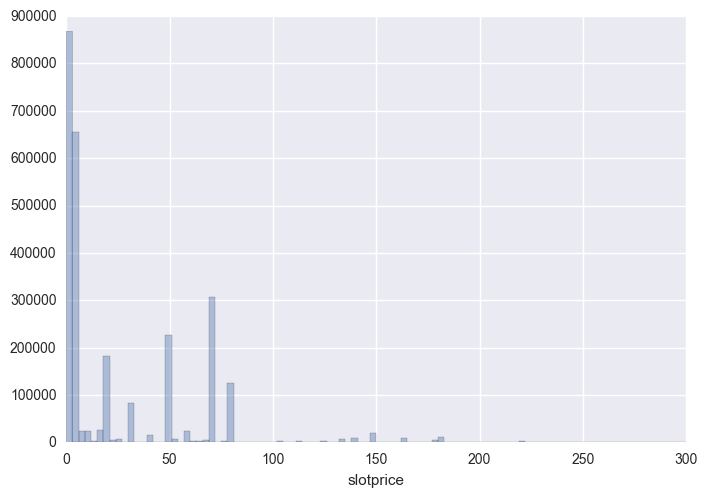

In [12]:
sns.distplot(df.slotprice, bins =100, kde = False)

#### Clicks and weekdays

In [13]:
c1= list(df.click == 1)

In [14]:
click_1 =df[c1]

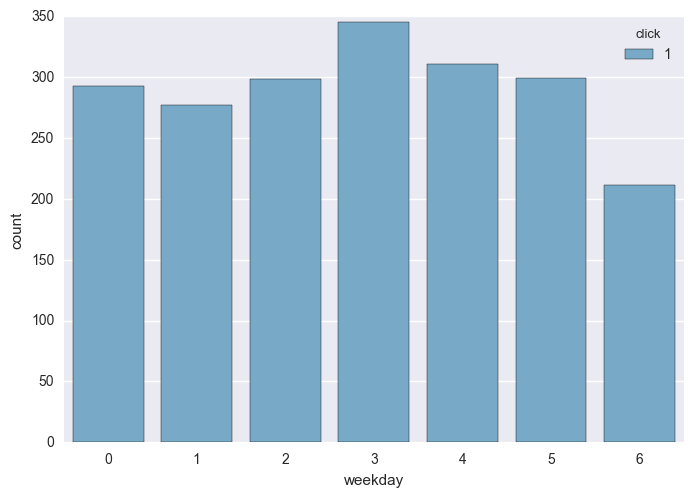

In [15]:
sns.countplot(x="weekday",hue="click", data = click_1, palette = 'Blues')

#### Biggest (largest amount of impressions) advertiser - 1458

In [16]:
ad1458 = list(df.advertiser == 1458)

In [17]:
ad_1458 = df[ad1458]
ad_1458.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"
11,0,3,21,cde466a7acd41122273aeddec18df1f9,1,u_Vh5h1ijSLHc9lmB,windows_chrome,119.50.16.*,55,64,...,90,0,0,50,832b91d59d0cb5731431653204a76c0e,300,50,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,13403,10057,10024,14273,10110"
12,0,5,0,e9468416f0a80bad92021e5b6dc9a535,1,u_Vhkx1JpxOZu6QbE,windows_chrome,183.44.177.*,216,224,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10052,13403,10006,10063"


In [18]:
ad_1458[ad_1458.click == 1].weekday.value_counts().sort_index()

0    66
1    63
2    63
3    68
4    72
5    65
6    54
Name: weekday, dtype: int64

In [19]:
example = pd.DataFrame(ad_1458[ad_1458.click == 1].weekday.value_counts())
example = example.sort_index()
example.columns = ['Number of clicks']
example

,Number of clicks
0,66
1,63
2,63
3,68
4,72
5,65
6,54


In [20]:
weekdays1 = pd.DataFrame(ad_1458.weekday.value_counts().sort_index())
weekdays1

,weekday
0,83994
1,72204
2,73810
3,76509
4,76835
5,78485
6,78456


In [21]:
#Concatenating the columns together
example = pd.concat([example, weekdays1],axis=1) #example.drop('weekday', axis=1, inplace=True) >> Use this to drop columns

In [22]:
# Example line >> df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
example['CTR'] = example['Number of clicks']/example['weekday']    

In [23]:
#Re-naming the column to counts
example = example.rename(columns={'weekday':'Weekday_counts'})  # Re-naming the column names

In [24]:
#Add an additional column to clarify the weekday
example['Weekdays'] = [0,1,2,3,4,5,6]

In [25]:
example

,Number of clicks,Weekday_counts,CTR,Weekdays
0,66,83994,0.000786,0
1,63,72204,0.000873,1
2,63,73810,0.000854,2
3,68,76509,0.000889,3
4,72,76835,0.000937,4
5,65,78485,0.000828,5
6,54,78456,0.000688,6


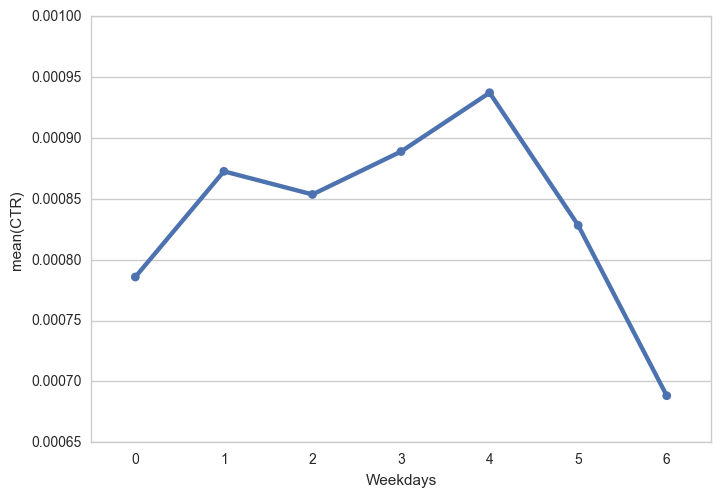

In [26]:
sns.set_style("whitegrid",{'axes.grid':True})
sns.despine()
sns.pointplot(x="Weekdays", y="CTR", data=example , markers= ['.'])  #--- Seaborn version


In [27]:
ad_1458 = pd.DataFrame({'impressions':df.groupby(['advertiser','weekday']).size()}).reset_index()
ad_1458[ad_1458.advertiser == 1458]

,advertiser,weekday,impressions
0,1458,0,83994
1,1458,1,72204
2,1458,2,73810
3,1458,3,76509
4,1458,4,76835
5,1458,5,78485
6,1458,6,78456


In [28]:
ad_1458_c = pd.DataFrame({'Clicks':df.groupby(['advertiser','weekday','click']).size()}).reset_index()

In [29]:
ad_1458_c= ad_1458_c[(ad_1458_c.advertiser == 1458)& (ad_1458_c.click == 1)].reset_index(drop= True)
ad_1458_c

,advertiser,weekday,click,Clicks
0,1458,0,1,66
1,1458,1,1,63
2,1458,2,1,63
3,1458,3,1,68
4,1458,4,1,72
5,1458,5,1,65
6,1458,6,1,54


In [30]:
ad_1458['Clicks'] = ad_1458_c['Clicks']

In [31]:
ad_1458[ad_1458.advertiser == 1458]

,advertiser,weekday,impressions,Clicks
0,1458,0,83994,66.0
1,1458,1,72204,63.0
2,1458,2,73810,63.0
3,1458,3,76509,68.0
4,1458,4,76835,72.0
5,1458,5,78485,65.0
6,1458,6,78456,54.0


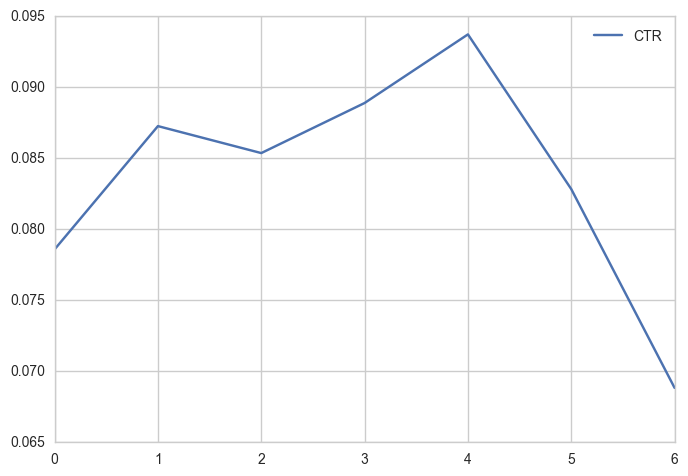

In [32]:
figure = plt.figure
ax = pd.DataFrame({'CTR':(ad_1458['Clicks']/ad_1458['impressions'])*100}).dropna().plot()

In [33]:
ad_3358 = pd.DataFrame({'impressions':df.groupby(['advertiser','weekday']).size()}).reset_index()
ad_3358 = ad_3358[ad_3358.advertiser == 3358].reset_index(drop=True)
ad_3358_c = pd.DataFrame({'Clicks':df.groupby(['advertiser','weekday','click']).size()}).reset_index()
ad_3358_c = ad_3358_c[(ad_3358_c.advertiser == 3358)&(ad_3358_c.click ==1)].reset_index(drop=True)
ad_3358['Clicks'] = ad_3358_c['Clicks']

In [34]:
ad_3386 = pd.DataFrame({'impressions':df.groupby(['advertiser','weekday']).size()}).reset_index()
ad_3386 = ad_3386[ad_3386.advertiser == 3386].reset_index(drop=True)
ad_3386_c = pd.DataFrame({'Clicks':df.groupby(['advertiser','weekday','click']).size()}).reset_index()
ad_3386_c = ad_3386_c[(ad_3386_c.advertiser == 3386)&(ad_3386_c.click ==1)].reset_index(drop=True)
ad_3386['Clicks'] = ad_3386_c['Clicks']

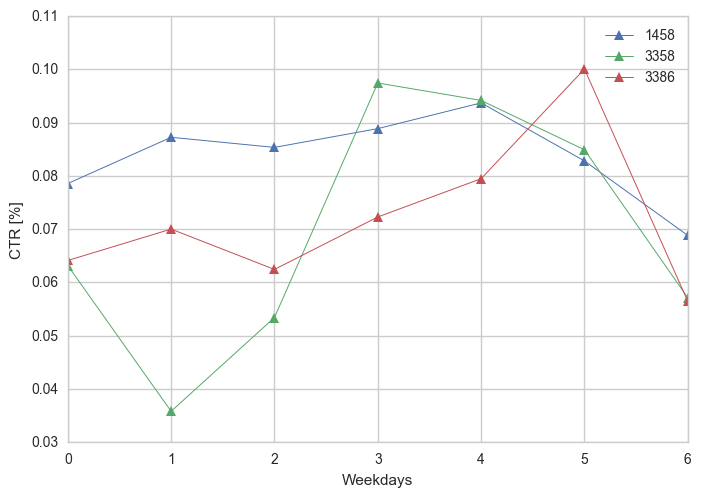

In [42]:
#Advertisers comparison
figure = plt.figure
ax = pd.DataFrame({'CTR':(ad_1458['Clicks']/ad_1458['impressions'])*100}).dropna().plot(linewidth =0.7 , marker = '^')
pd.DataFrame({'CTR':(ad_3358['Clicks']/ad_3358['impressions'])*100}).plot(ax=ax,linewidth =0.7,marker = '^')
pd.DataFrame({'CTR':(ad_3386['Clicks']/ad_3386['impressions'])*100}).plot(ax=ax,linewidth =0.7,marker = '^')
ax.set_ylabel('CTR [%]')
ax.legend(['1458','3358','3386'])
ax.set_xlabel('Weekdays')

#Save image
#plt.savefig('Advertisers.jpg',bbox_inches='tight')

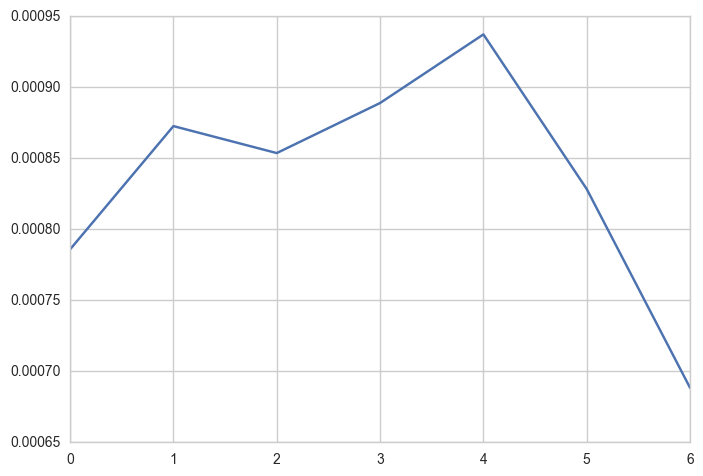

In [36]:
#CTR plot base on the weekdays
ax = example.CTR.plot()

In [37]:
ad_1458.shape  # Number of impressions = 540293

(50, 4)

### Need to create Dataset Statistics table ??

In [38]:
#1- Adveriser 
df_stats = pd.DataFrame(np.sort(df['advertiser'].unique().tolist()))

In [39]:
#2 - Number of impressions
df_stats['Impressions']= df['advertiser'].value_counts().sort_index().tolist()

In [40]:
#3 - Number of clicks
df_stats['Clicks']= df[df.click == 1].advertiser.value_counts().sort_index().tolist()

In [40]:
df_stats.columns = ['Advertisers','Impressions','Clicks']

#### Calculation for the total slot price

In [41]:
#Listing all the advertiser IDS - 1458    540293
ad_id= [3386,3427,3476,3358,2821,2259,2261,2997,1458]
ad_id.sort()
ad_id

[1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476]

In [42]:
#List of the advertisers - Used for checking
df.advertiser.value_counts()

1458    540293
3386    498554
3427    454031
3476    346778
3358    304782
2821    231416
2259    146778
2261    120619
2997     54487
Name: advertiser, dtype: int64

In [43]:
df[df.advertiser == 1458].head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,...,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"
11,0,3,21,cde466a7acd41122273aeddec18df1f9,1,u_Vh5h1ijSLHc9lmB,windows_chrome,119.50.16.*,55,64,...,90,0,0,50,832b91d59d0cb5731431653204a76c0e,300,50,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,13403,10057,10024,14273,10110"
12,0,5,0,e9468416f0a80bad92021e5b6dc9a535,1,u_Vhkx1JpxOZu6QbE,windows_chrome,183.44.177.*,216,224,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10052,13403,10006,10063"


In [44]:
#Left column is only index therefore you can add the total  -- Example cross-examine this with the for loop value
sum(df[df.advertiser == 1458].slotprice) # >>> THIS is only for advertiser 1458

15271374

In [45]:
#Column 4 - Costs (either the summation of the slot price or the summation of the pay price)
for advertiser_id in ad_id:
    ad_data = df[df.advertiser == advertiser_id]
    slot_total= sum(ad_data.slotprice)
    print (slot_total)


15271374
3615396
3223072
5421799
1853120
5119362
14699725
13045946
9199370


In [46]:
#4.1 - Slotprice total
df_stats['Slotprice_total [RMB]']= [15271374,3615396,3223072,5421799,1853120,5119362,14699725,13045946,9199370]

#### Calculation for the payprice

In [47]:
sum(df[df.advertiser == 1458].payprice)

37231239

In [48]:
for advertiser_id in ad_id:
    ad_data = df[df.advertiser == advertiser_id]
    pay_total= sum(ad_data.payprice)
    print (pay_total)


37231239
13649026
10789152
20625766
3413227
28145288
38341028
36820111
27481402


In [49]:
#4.2 - Payprice total
df_stats['Payprice_total [RMB]']= [37231239,13649026,10789152,20625766,3413227,28145288,38341028,36820111,27481402]

In [50]:
#Column 5 - CTR percentage
df_stats['CTR [%]']= (df_stats['Clicks']/df_stats['Impressions'])*100  

In [51]:
#df_stats.drop('CTR [%]', axis=1, inplace=True) - Only used this code for dropping columns

In [52]:
#Column 6- CPM 
df_stats['CPM [fen]']= (df_stats['Payprice_total [RMB]']/df_stats['Impressions'])

In [53]:
#Column 7- eCPC
df_stats['eCPC']= (df_stats['Payprice_total [RMB]']/df_stats['Clicks'])/1000

In [54]:
df_stats= df_stats.round({ 'CTR [%]': 3, 'CPM [fen]': 2,'eCPC':2})

#### Dataset statistics check

In [55]:
df_stats['eCPC'].mean()

147.50222222222223

In [56]:
df_stats= df_stats.rename(index={0:'Chinese vertical e-commerce',1:'Milk powder',2:'Telecom',3:'Footwear',4:'Mobile e-commerce app install',5:'International e-commerce',6:'Software6',7:'Oil',8:'Tire'})

In [57]:
df_stats

,Advertisers,Impressions,Clicks,Slotprice_total [RMB],Payprice_total [RMB],CTR [%],CPM [fen],eCPC
Chinese vertical e-commerce,1458,540293,451,15271374,37231239,0.083,68.91,82.55
Milk powder,2259,146778,45,3615396,13649026,0.031,92.99,303.31
Telecom,2261,120619,37,3223072,10789152,0.031,89.45,291.60
Footwear,2821,231416,144,5421799,20625766,0.062,89.13,143.23
Mobile e-commerce app install,2997,54487,251,1853120,3413227,0.461,62.64,13.60
International e-commerce,3358,304782,233,5119362,28145288,0.076,92.35,120.80
Software6,3386,498554,358,14699725,38341028,0.072,76.90,107.10
Oil,3427,454031,340,13045946,36820111,0.075,81.10,108.29
Tire,3476,346778,175,9199370,27481402,0.050,79.25,157.04


In [58]:
#print (df_stats.to_latex()) #Latex format

In [63]:
print ('Basic Statistics table')
print ('----------------------------------------------------')
print ('Total number of clicks : ' + str(np.round(df_stats['Clicks'].sum())))
print ('Total number of impressions : ' + str(np.round(df_stats['Impressions'].sum())))
print ('Total slotprice of all advertisers : ' + str(np.round(df_stats['Slotprice_total [RMB]'].sum()))+ str(' RMB'))
print ('Total payprice of all advertisers : ' + str(np.round(df_stats['Payprice_total [RMB]'].sum()))+ str(' RMB'))
print ('----------------------------------------------------')
print ('Average CTR : ' + str(np.round(df_stats['CTR [%]'].mean(), decimals=3)) + str(' %'))
print ('Average CPM : ' + str(np.round(df_stats['CPM [fen]'].mean(),decimals=3)) + str(' Fen'))
print ('Average eCPC : ' + str(np.round(df_stats['eCPC'].mean(), decimals=3))+ str(' Fen'))

Basic Statistics table
----------------------------------------------------
Total number of clicks : 2034
Total number of impressions : 2697738
Total slotprice of all advertisers : 71449164 RMB
Total payprice of all advertisers : 216496239 RMB
----------------------------------------------------
Average CTR : 0.105 %
Average CPM : 81.413 Fen
Average eCPC : 147.502 Fen


In [60]:
df_stats['Clicks'].sum() #2034 clicks

2034

In [61]:
df[df.click == 1].advertiser.value_counts().sort_index()

1458    451
2259     45
2261     37
2821    144
2997    251
3358    233
3386    358
3427    340
3476    175
Name: advertiser, dtype: int64

In [62]:
# Lasso linear model
#    fitting data 
#    making a prediction and (prediction - truth labels)